## EDA of 77 Different Cereal Products' Nutrient Information

https://www.kaggle.com/crawford/80-cereals/

Variable Label Info

- Name: Name of cereal
- mfr: Manufacturer of cereal
  - A = American Home Food Products;
  - G = General Mills
  - K = Kelloggs
  - N = Nabisco
  - P = Post
  - Q = Quaker Oats
  - R = Ralston Purina
- type: cold/hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals / 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('cereal.csv')

In [3]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.7+ KB


### Univariate Analysis

In [6]:
# Distinguishing Categorical variables and Numerical variables

cat_var = data.select_dtypes(include=['object']).columns.values.tolist()
cat_var.remove('name') # This variable is more like a id than a variable
num_var = data.select_dtypes(exclude=['object']).columns.values.tolist()

In [7]:
cat_var

['mfr', 'type']

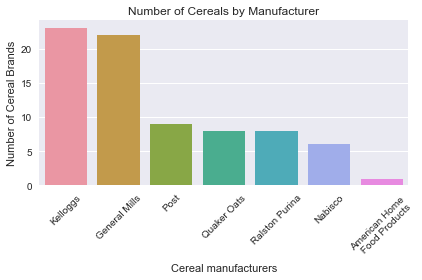

In [37]:
sns.barplot(data['mfr'].value_counts().index, data['mfr'].value_counts().values)
manufacturers = ['Kelloggs', 'General Mills', 'Post','Quaker Oats','Ralston Purina','Nabisco','American Home \n Food Products']
y_pos = np.arange(len(manufacturers))
plt.xticks(y_pos, manufacturers, rotation = 45, fontsize = 10) #set labels for each column
plt.ylabel("Number of Cereal Brands")
plt.xlabel("Cereal manufacturers")
plt.title("Number of Cereals by Manufacturer")
plt.tight_layout()

(-1.1074665184305263,
 1.1014014886517105,
 -1.1095465503624018,
 1.1057791146982729)

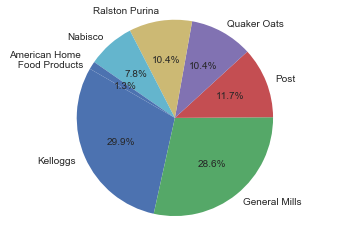

In [42]:
#draw pie chart of manufacturer data
#draw pie chart & add percentages on each slice

plt.pie(data['mfr'].value_counts(), labels=manufacturers, autopct='%1.1f%%', startangle = 150)
plt.axis('equal')

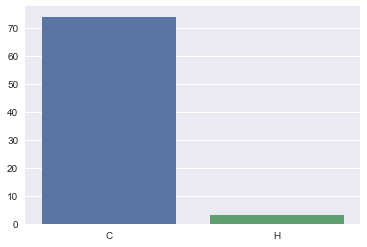

In [36]:
sns.barplot(data['type'].value_counts().index, data['type'].value_counts().values)

In [9]:
data['type'].value_counts().values[0] / data['type'].value_counts().values[1]

24.666666666666668

- Kelloggs and Nabisco are the undisputable top 2 cereal companies with the biggest number of cereal products
- There are 24 times more cold cereal items than hot ones

In [10]:
num_var

['calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'vitamins',
 'shelf',
 'weight',
 'cups',
 'rating']

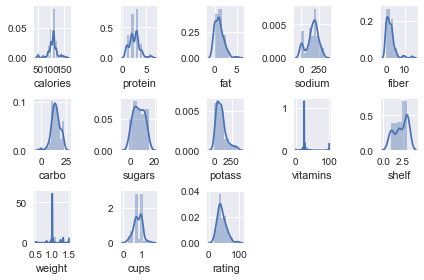

In [11]:
for i,v in enumerate(num_var):
    plt.subplot(3,5,i+1)
    sns.distplot(data[v])
plt.tight_layout()

- Most of the variables seem to resemble a normal distribution
- Vitamins and Weight, in particular, have a huge spike in the middle and the other values are close to being invisible. This suggests most of the cereals out in the market have very similar vitamin levels and weight
- For sodium, the distribution is bimodal(two spikes). There are some cereals that have low sodium levels while some others have high levels of sodium. This reflects the fact that more cereals with lower sodium levels are being manufactured to satisfy consumers' health and well-being concerns.

### Bivariate Analysis

In [12]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [13]:
# 2 categorical variables: mfr and type
table = pd.crosstab(data['mfr'], data['type'])
prop_table = table.apply(lambda x: x/sum(x),axis=0)

In [14]:
table

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,5,1
P,9,0
Q,7,1
R,8,0


In [15]:
prop_table

type,C,H
mfr,,
A,0.000000,0.333333
G,0.297297,0.000000
K,0.310811,0.000000
N,0.067568,0.333333
P,0.121622,0.000000
Q,0.094595,0.333333
R,0.108108,0.000000


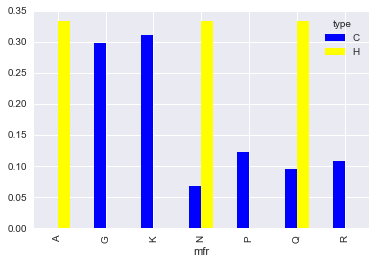

In [16]:
prop_table.plot(kind='bar', color=['blue','yellow'])

- About 31% and 29% of cold cereal brands are made by Kellogg and General Mills. Interestingly, Nabisco, which was one of the top2 cereal company for having the biggest number of cereal brands, barely make cold cereal. It is, instead, breaking through the hot cereal market.
- Only three companies make hot cereal: Nabisco, American Home Food Products and Quaker Oats. They each make one brand of hot cereal, taking up about 33% of the total number of cereal brands out there.

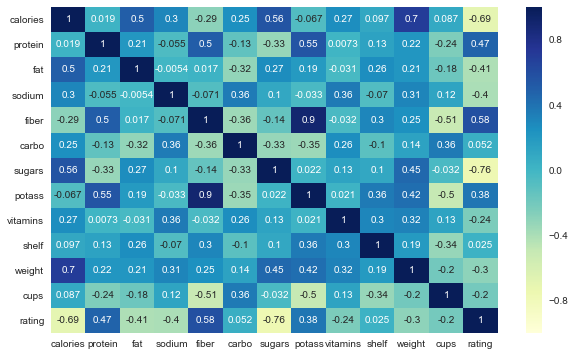

In [17]:
# Numerical variables : correlation

plt.figure(figsize=(10,6))
with sns.axes_style("white"):
    sns.heatmap(data.select_dtypes(exclude=['object']).corr(), cmap="YlGnBu", annot=True)

- Potassium levels and fiber has very high (close to 1) correlation value. It's probably because grain we use to make cereal contains a lot of potassium and fiber at the same time, so the more we put in grain into making cereal, these two variables will go up together
- Rating has pretty high negative correlation with calories and sugar. On the other hand, protein and fiber variables have pretty high positive correlation with rating. This reflects people's interest in health and low-calorie wholesome food nowadays.
- weight(ounces in one serving) has pretty high correlation with calories. I guess this is natural since food with higher calories has more stuff in one serving, making it heavier

In [18]:
# Comparing numerical values of two categorical variables
# Is there a statistically signficant difference in mean of sodium, calories and sugar between hot and cold cereals?

from scipy.stats import probplot
import pylab
from scipy.stats import ttest_ind

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

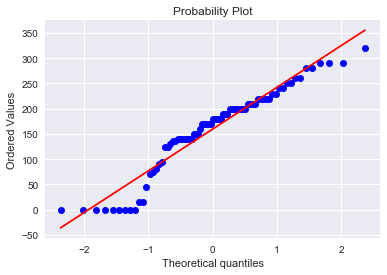

In [19]:
# Checking normality for t-test
probplot(data["sodium"], dist="norm", plot=pylab)

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

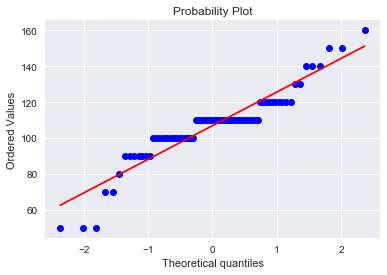

In [20]:
# Checking normality for t-test
probplot(data["calories"], dist="norm", plot=pylab)

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

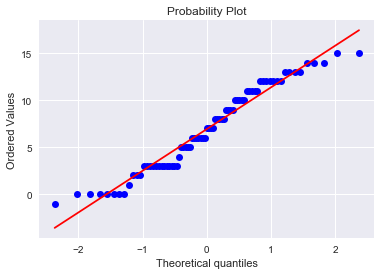

In [21]:
# Checking normality for t-test
probplot(data["sugars"], dist="norm", plot=pylab)

- Distribution of sodium and calories look pretty normal except for some points clustered at the lower end. But the deviation isn't that severe, so we can assume that they are normally distributed. Sugars distribution looks normally distributed

In [22]:
# Is there a statistically significant difference in mean sodium level between hot and cold cereals?

hot_sodium = data["sodium"][data["type"] == "H"]
cold_sodium = data["sodium"][data["type"] == "C"]

# compare them
ttest_ind(hot_sodium, cold_sodium, equal_var=False)

Ttest_indResult(statistic=-4.8963576189325932, pvalue=0.024114820819458219)

In [23]:
print("Mean sodium for the hot cereals:")
print(hot_sodium.mean())

print("Mean sodium for the cold cereals:")
print(cold_sodium.mean())

Mean sodium for the hot cereals:
26.666666666666668
Mean sodium for the cold cereals:
165.06756756756758


pvalue is 0.02 which is lower than the significance value of 0.05, so we reject the null hypothesis and conclude that there is actually a statistically significant evidence that cold cereals have, on average, higher levels of sodium than hot cereals.

In [24]:
# Is there a statistically significant difference in mean calorie level between hot and cold cereals?

hot_calories = data["calories"][data["type"] == "H"]
cold_calories = data["calories"][data["type"] == "C"]

# compare them
ttest_ind(hot_calories, cold_calories, equal_var=False)

Ttest_indResult(statistic=-3.1070612896033047, pvalue=0.0026917108125549551)

In [25]:
print("Mean calories for the hot cereals:")
print(hot_calories.mean())

print("Mean calories for the cold cereals:")
print(cold_calories.mean())

Mean calories for the hot cereals:
100.0
Mean calories for the cold cereals:
107.16216216216216


pvalue is 0.002 which is lower than the significance value of 0.05, so we reject the null hypothesis and conclude that there is actually a statistically significant evidence that cold cereals have, on average, higher levels of calories than hot cereals.

In [26]:
# Is there a statistically significant difference in mean calorie level between hot and cold cereals?

hot_sugars = data["sugars"][data["type"] == "H"]
cold_sugars = data["sugars"][data["type"] == "C"]

# compare them
ttest_ind(hot_sugars, cold_sugars, equal_var=False)

Ttest_indResult(statistic=-4.9948464517555546, pvalue=0.018743720131906921)

In [27]:
print("Mean sugars for the hot cereals:")
print(hot_sugars.mean())

print("Mean sugars for the cold cereals:")
print(cold_sugars.mean())

Mean sugars for the hot cereals:
0.6666666666666666
Mean sugars for the cold cereals:
7.175675675675675


pvalue is 0.019 which is lower than the significance value of 0.05, so we reject the null hypothesis and conclude that there is actually a statistically significant evidence that cold cereals have, on average, higher levels of sugar than hot cereals.

Interestingly, there is statistically significant evidence that cold cereals have higher levels of sodium, calories and sugar than hot cereals